In [2]:
import numpy as np
import pandas as pd

In [3]:
catalog = np.loadtxt("../../../Training/catalogs/short_file.txt", dtype = str)

In [4]:
print catalog.shape
catalog

(146294, 25)


array([['11445144', '8', '70.0385', ..., 'null', 'null', 'null'],
       ['11496840', '8', '87.8829', ..., 'null', 'null', 'null'],
       ['11497236', '8', '88.3020', ..., 'null', 'null', 'null'],
       ..., 
       ['10477762', '39', '246.9499', ..., 'null', 'null', 'null'],
       ['10477794', '39', '15.3987', ..., 'null', 'null', 'null'],
       ['10477878', '39', '44.5426', ..., 'null', 'null', 'null']], 
      dtype='|S12')

In [5]:
catalog_header = np.loadtxt("../../../Training/catalogs/short_file_header_cleaned.txt", dtype = str)


In [6]:
print catalog_header.shape

(25,)


In [7]:
catalog_header

array(['KIC_ID', 'Sky_Group', 'i_period', 'i_epoch', 'N_Transit',
       'i_depth', 'i_dur', 'i_b', 'i_ror', 'i_dor', 'EB_injection',
       'Offset_from_source', 'Offset_distance', 'Expected_MES',
       'Recovered', 'TCE_ID', 'Measured_MES', 'r_period', 'r_epoch',
       'r_depth', 'r_dur', 'r_b', 'r_ror', 'r_dor', 'Fit_Provenance'], 
      dtype='|S18')

In [8]:
complete_catalog = pd.DataFrame(catalog, columns=catalog_header)
print np.unique(complete_catalog["Sky_Group"])
complete_catalog.head()


['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36'
 '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '5'
 '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61' '62' '63'
 '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74' '75' '76' '77'
 '78' '79' '8' '80' '81' '82' '83' '84' '9']


,KIC_ID,Sky_Group,i_period,i_epoch,N_Transit,i_depth,i_dur,i_b,i_ror,i_dor,...,TCE_ID,Measured_MES,r_period,r_epoch,r_depth,r_dur,r_b,r_ror,r_dor,Fit_Provenance
0,11445144,8,70.0385,107.4886,0.9808,1662,4.02030,0.4141,0.0306,126.498,...,null,null,null,null,null,null,null,null,null,null
1,11496840,8,87.8829,103.9753,0.9808,1561,2.20705,0.7649,0.0350,214.397,...,null,null,null,null,null,null,null,null,null,null
2,11497236,8,88.3020,84.4552,0.9808,1332,2.11234,0.8100,0.0334,207.336,...,null,null,null,null,null,null,null,null,null,null
3,11548779,8,35.4942,73.9562,2.9425,686,1.00655,0.8915,0.0247,138.661,...,null,null,null,null,null,null,null,null,null,null
4,11600744,8,48.8212,97.2396,23.2943,372,1.77915,0.8738,0.0183,110.768,...,null,null,null,null,null,null,null,null,null,null


In [9]:
#load catalog of files that we actually have, and only process the first 10000
catalog_used = np.loadtxt("../../../Training/simulation/primaryinj1/prim.ls", dtype = str)[:10000]
print catalog_used[:10]
#prim_ltf.lc.bls

['kplr001026032-0_prim.txt' 'kplr001026032-1_prim.txt'
 'kplr001026032-2_prim.txt' 'kplr001026032-3_prim.txt'
 'kplr001026032-4_prim.txt' 'kplr001026326-0_prim.txt'
 'kplr001026326-1_prim.txt' 'kplr001026326-2_prim.txt'
 'kplr001026326-3_prim.txt' 'kplr001026326-4_prim.txt']


In [10]:
#try generating one feat, then make it a script
#0 for star name, then id, then 35 feats
inj_feats = np.zeros((10000,37))
data_labels = np.core.defchararray.add(catalog[:,0], "-")
data_labels = np.core.defchararray.add(data_labels, catalog[:,1])
print data_labels
print data_labels.shape

['11445144-8' '11496840-8' '11497236-8' ..., '10477762-39' '10477794-39'
 '10477878-39']
(146294,)


In [11]:
#load feat files
feat_files = pd.read_csv("../Data/Kplr_feat_files_10000.csv", index_col =0 )
print feat_files.shape
print np.unique(feat_files["segment"])
feat_files.head()

(10000, 37)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.]


,star_id,segment,mod_sig_pri_dv,mod_sig_sec_dv,mod_sig_ter_dv,mod_sig_pos_dv,mod_fa1_dv,mod_fa2_dv,mod_fred_dv,modshiftval1_dv,...,BLS_i2_1_0,BLS_deltaChi2_1_0,BLS_fraconenight_1_0,BLS_Npointsintransit_1_0,BLS_Ntransits_1_0,BLS_Npointsbeforetransit_1_0,BLS_Npointsaftertransit_1_0,BLS_Rednoise_1_0,BLS_Whitenoise_1_0,BLS_SignaltoPinknoise_1_0
0,1026032.0,0.0,0.06869,-9.991249,0.009099,-0.020914,3.361927,3.045619,1.248157,-3.306894,...,0.74126,-0.00034,0.49239,18.0,3.0,23.0,23.0,0.00174,0.00330,54.05323
1,1026032.0,1.0,0.06987,-9.991297,0.008799,-0.010148,3.424279,3.027516,1.213860,-3.366719,...,0.13143,-0.00063,0.25802,35.0,4.0,26.0,33.0,0.00178,0.00286,68.95900
2,1026032.0,2.0,0.07517,-9.989414,0.011299,-0.018384,3.422635,3.025687,1.261802,-3.363062,...,0.42787,-0.00068,0.26134,33.0,4.0,27.0,31.0,0.00177,0.00294,73.44339
3,1026032.0,3.0,0.07313,-9.989979,0.010481,-0.016087,3.423239,3.026359,1.210633,-3.362833,...,0.22083,-0.00067,0.25854,35.0,4.0,27.0,32.0,0.00183,0.00305,69.53263
4,1026032.0,4.0,0.07558,-9.990860,0.009420,-0.021778,3.418987,3.021628,1.209183,-3.356482,...,0.85813,-0.00051,0.33593,28.0,4.0,32.0,30.0,0.00182,0.00311,69.66765


In [12]:
from matplotlib import pyplot as plt
%matplotlib inline
import time

In [13]:
print
print np.where( max(complete_catalog["i_depth"]) ==complete_catalog)[0]
complete_catalog.head()


[  1587   2135   9931  10259  15422  32913  33028  45129  45873  47248
  51482  53728  55485  60571  61126  62742  63458  66758  67525  68020
  68108  70961  71717  71823  76700  78520  81841  89123  90157  94573
  95499  98300  98923 104265 105587 105910 112665 114750 119388 131620
 132003 133865 135769 137476]


,KIC_ID,Sky_Group,i_period,i_epoch,N_Transit,i_depth,i_dur,i_b,i_ror,i_dor,...,TCE_ID,Measured_MES,r_period,r_epoch,r_depth,r_dur,r_b,r_ror,r_dor,Fit_Provenance
0,11445144,8,70.0385,107.4886,0.9808,1662,4.02030,0.4141,0.0306,126.498,...,null,null,null,null,null,null,null,null,null,null
1,11496840,8,87.8829,103.9753,0.9808,1561,2.20705,0.7649,0.0350,214.397,...,null,null,null,null,null,null,null,null,null,null
2,11497236,8,88.3020,84.4552,0.9808,1332,2.11234,0.8100,0.0334,207.336,...,null,null,null,null,null,null,null,null,null,null
3,11548779,8,35.4942,73.9562,2.9425,686,1.00655,0.8915,0.0247,138.661,...,null,null,null,null,null,null,null,null,null,null
4,11600744,8,48.8212,97.2396,23.2943,372,1.77915,0.8738,0.0183,110.768,...,null,null,null,null,null,null,null,null,null,null


In [90]:
start = time.time()
SNR = np.zeros(10000)
SNR_raw = np.zeros(10000)

bls_periods = np.zeros_like(SNR)
real_periods = np.zeros_like(SNR)
i_ror = np.zeros_like(SNR)
#load data
print catalog_used.shape
for i, name in enumerate(catalog_used[:]):
    bls_name = name.split(".")[0] + "_ltf.blsanal"
    detrended = name.split(".")[0] + "_ltf.lc"
    bls_data = np.loadtxt("../../../Training/simulation/primaryinj1/"+bls_name)[0, 0:]
    first_lc = np.loadtxt("../../../Training/simulation/primaryinj1/" + name)
    lc_detrended = np.loadtxt("../../../Training/simulation/primaryinj1/" + detrended)
    
    #print bls_name, name
    #print "BLS vals"
    #print bls_data
    starname =  str(int(name.split("kplr")[1].split("-")[0]))
    star_segment = name.split("kplr")[1].split("-")[1].split("_")[0]
    #print starname, star_segment
    #plt.figure(figsize=(15,10))
    #plt.scatter(first_lc[:, 0], first_lc[:,1], marker = ".")
    #plt.scatter(lc_detrended[:, 0], lc_detrended[:, 2])
    #print "Days?", first_lc.shape[0]/48.
    #assuming this is still at 30 min cadence
    transit_duration_phase = np.abs(bls_data[7])
    period = bls_data[1]
    bls_periods[i] = period
    #print "BLS period", period
    n_points_transit = transit_duration_phase*period *float(48)
    #print starname, star_segment
    data_duration = first_lc.shape[0]/48. # days
    #print "Data duration", data_duration
    location = np.where(starname == complete_catalog["KIC_ID"] )[0]
    #print location
    real_periods[i] = float(complete_catalog["i_period"][location])
    i_ror[i] = float(complete_catalog["i_ror"][location])
    #plt.figure(figsize=(15,10))
    #plt.scatter((lc_detrended[:,0]/real_periods[i]) %1, lc_detrended[:,1], marker = ".")
    #plt.scatter((lc_detrended[:,0]/bls_periods[i]) %1, lc_detrended[:,1])

    
    #print "Real:", real_periods[i], "Inj:", bls_periods[i]#, period
    #print location
    #print complete_catalog.loc[location]
    depth = float(complete_catalog["i_depth"][location]) 
    median = np.median(lc_detrended[:,2]) # flux
    error = np.median(np.abs(lc_detrended[:,2]-median)**2)**0.5
    transits = data_duration//float(complete_catalog["i_period"][location]) +1
    SNR[i] = depth*np.sqrt(transits) * np.sqrt(n_points_transit)/(error*np.sqrt(2))
    SNR_raw[i] = i_ror[i]**2 *np.sqrt(transits) * np.sqrt(n_points_transit)/(error*np.sqrt(2))

    if i %1000 == 999:
        print i
    #break
    #print transits, i, data_duration, float(complete_catalog["i_period"][location]), location
    #print n_points_transit, transit_duration_phase

    #print feat_files.columns.values[17:]
    #print bls_data
    #print period
    #break
    
end = time.time()
print"Time", end - start, "seconds"
    

(10000,)
999
1999
2999
3999
4999
5999
6999
7999
8999
9999
Time 425.205909014 seconds


Above Threshold of 6 358
Above Threshold of 6 for Raw SNR 241


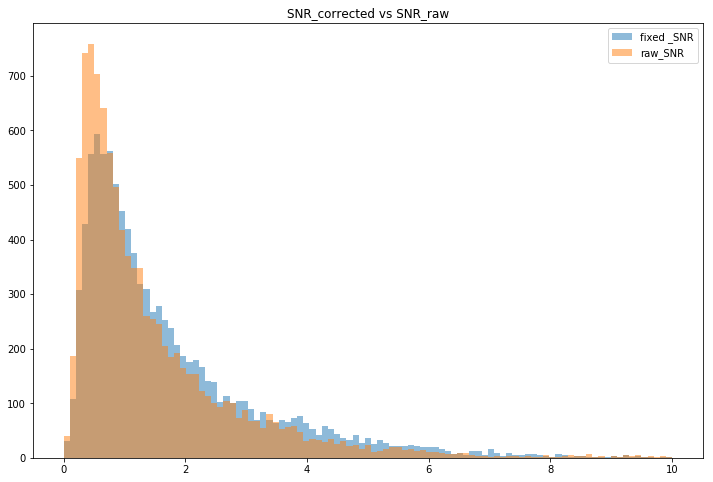

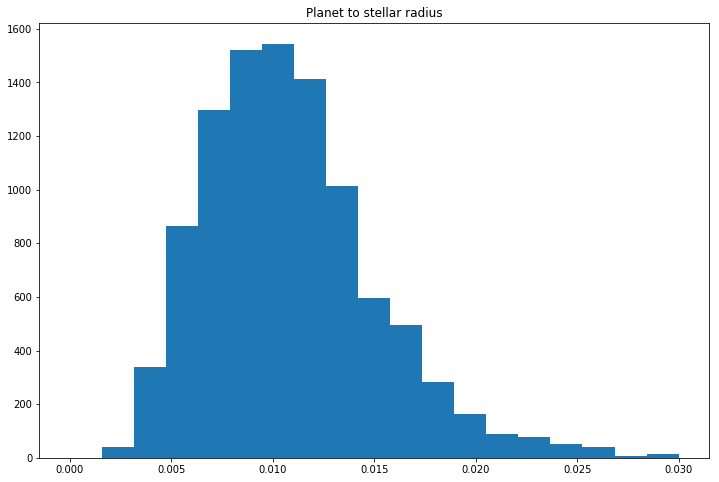

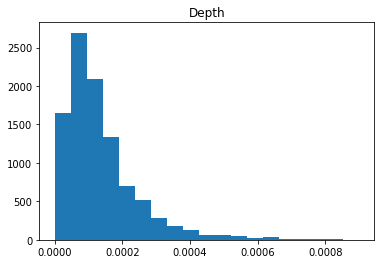

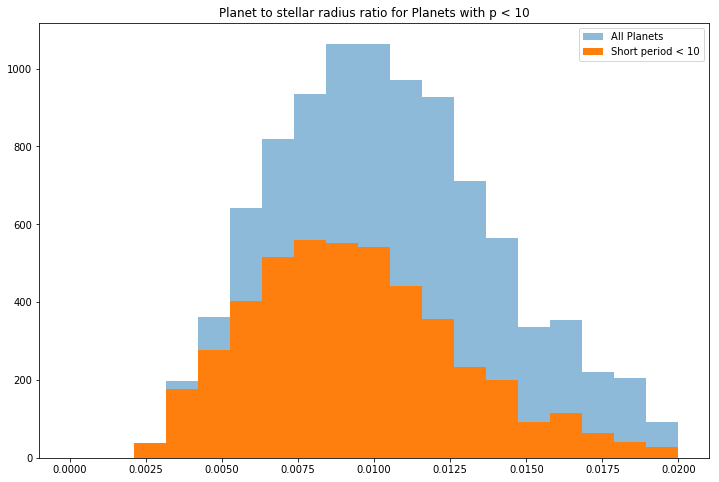

In [159]:
fixed_SNR = SNR/1000000. # parts per million conversion
plt.figure(figsize = (12, 8))
bins = np.linspace(0,10,100)
plt.hist(fixed_SNR, bins = bins, alpha = 0.5, label = "fixed _SNR")
plt.title("SNR_corrected vs SNR_raw")
print "Above Threshold of 6", len(np.where(fixed_SNR>6)[0])
#plt.figure()
plt.hist(SNR_raw, bins = bins, alpha = 0.5, label = "raw_SNR")
#plt.title("Raw_SNR")
print "Above Threshold of 6 for Raw SNR", len(np.where(SNR_raw>6)[0])
plt.legend()
#print len(np.where(fixed_SNR>6)[0])
#print catalog_used[:10]
#print feat_files[["star_id", "segment"]]
plt.figure(figsize = (12, 8))
plt.hist(i_ror, bins = np.linspace(0,0.03, 20)) # planet to stellar radius ratio
plt.title("Planet to stellar radius")
plt.figure()
plt.title("Depth")
plt.hist(i_ror**2, bins = np.linspace(0,0.03**2, 20)) # depth

#stars with planets with periods under 10 days
short_planets_ind = np.where(real_periods < 10)[0]
plt.figure(figsize = (12, 8))
bins = np.linspace(0,0.02, 20)
plt.hist(i_ror, bins = bins, alpha = .5, label = "All Planets")
plt.hist(i_ror[short_planets_ind], bins = bins, alpha = 1, label = "Short period < 10")

plt.legend()

plt.title("Planet to stellar radius ratio for Planets with p < 10")


In [95]:
##save the necessary periods
size = real_periods.shape[0]
period_feats = np.hstack([feat_files[["star_id", "segment"]].values, real_periods.reshape(size, 1)])
np.savetxt("../Data/Kplr_inj_periods_10000.txt", period_feats)

period_feats = np.hstack([feat_files[["star_id", "segment"]].values, bls_periods.reshape(size, 1)])
np.savetxt("../Data/Kplr_bls_periods_10000.txt", period_feats)

In [96]:
print feat_files[["star_id", "segment"]].values.shape
print fixed_SNR.reshape((10000,1)).shape
size = SNR.shape[0]
SNR_feats = np.hstack([feat_files[["star_id", "segment"]].values, fixed_SNR.reshape(size, 1)])
print SNR_feats.shape
np.savetxt("../Data/SNR_feats_kplr_inj_10000_detrended.txt", SNR_feats)

(10000, 2)
(10000, 1)
(10000, 3)


(array([  8.81300000e+03,   9.87000000e+02,   1.00000000e+02,
          3.80000000e+01,   3.30000000e+01,   1.50000000e+01,
          5.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          2.00000000e+00]),
 array([  2.55416979e-02,   3.76555886e+00,   7.50557601e+00,
          1.12455932e+01,   1.49856103e+01,   1.87256275e+01,
          2.24656446e+01,   2.62056618e+01,   2.99456790e+01,
          3.36856961e+01,   3.74257133e+01]),
 <a list of 10 Patch objects>)

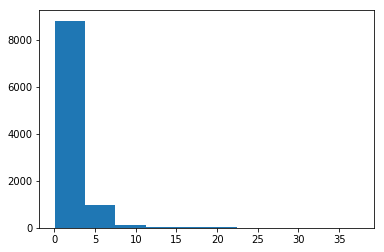

In [97]:
real_periods = np.loadtxt("../Data/Kplr_inj_periods_10000.txt")[:,-1]
bls_periods = np.loadtxt("../Data/Kplr_bls_periods_10000.txt")[:,-1]
SNR_feats = np.loadtxt("../Data/SNR_feats_kplr_inj_10000_detrended.txt")
plt.hist(SNR_feats[:,-1])

In [98]:
#generate period error
#period error function
def period_func(vals, p_bls, p_inj):
    a, b = vals
    a = np.rint(a)
    b = np.rint(b)   
    return np.abs((a*p_bls - b*p_inj) / 0.5/(a*p_bls + b*p_inj))

In [99]:
from scipy.optimize import brute

In [100]:
rranges=(slice(1, 6, 1), slice(1, 6, 1))
harmonics_kplr = np.empty(shape = [catalog_used.shape[0],2])
print harmonics_kplr.shape
for i in range(catalog_used.shape[0]):
    results = brute(period_func, ranges=rranges, args=(bls_periods[i], real_periods[i]), full_output=True, finish= None)
    #print results[0]
    harmonics_kplr[i, :] =results[0]
    try:
        results[0].astype(int)
    except:
        print i
    #print results[0], print 
    #break
print harmonics_kplr.shape
print harmonics_kplr[:10, :]
print real_periods[:10], bls_periods[:10]

(10000, 2)
(10000, 2)
[[ 1.  5.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1.  5.]
 [ 4.  5.]
 [ 3.  2.]
 [ 3.  5.]
 [ 2.  5.]
 [ 1.  5.]]
[ 1.7255  1.7255  1.7255  1.7255  1.7255  2.2181  2.2181  2.2181  2.2181
  2.2181] [  8.47108156   8.45997335   8.46136028   8.45997335   8.45997335
   2.6097475    1.47296574   3.89504691   6.01278481  11.18901228]


In [64]:
#calculate the error
#save the real periods
#np.savetxt("../Data/Kplr_periods_10000.txt", real_periods)


In [65]:
#calculate error
tol = np.zeros_like(SNR)
for i in range(catalog_used.shape[0]):
    tol[i] = period_func(harmonics_kplr[i, :], bls_periods[i], real_periods[i])#, ranges=rranges, args=(bls_periods[i], real_periods[i]), full_output=True, finish= None)
    #print results[0]
    #harmonics_kplr[i, :] =results[0]
    #try:
    #    results[0].astype(int)
    ##except:
    #   print i
    #print results[0], print 
    #break
print tol[:10]

[ 0.01829607  0.01960812  0.01944421  0.01960812  0.01960812  0.06052257
  0.00390798  0.05221726  0.08090213  0.00884331]


(array([ 5034.,   476.,   491.,   498.,   536.,   643.,   653.,   640.,
          649.,   380.]),
 array([  1.20269787e-05,   1.54699578e-01,   3.09387128e-01,
          4.64074679e-01,   6.18762230e-01,   7.73449781e-01,
          9.28137331e-01,   1.08282488e+00,   1.23751243e+00,
          1.39219998e+00,   1.54688753e+00]),
 <a list of 10 Patch objects>)

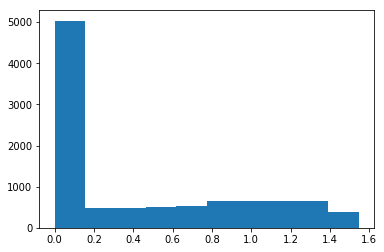

In [109]:
plt.hist(tol)

In [110]:

print len(np.where((fixed_SNR>6))[0])

print len(np.where((fixed_SNR>6)* (real_periods<(26./3)))[0])

#only 4117 true signals that should be seen
print len(np.where((fixed_SNR>6)* (real_periods<(26./3))*(tol>0.02) )[0])
#error is larger than previous tolerance in 3404 cases
indices = np.where((fixed_SNR>6)* (real_periods<(26./3))*(tol>0.02) )[0]
print real_periods[indices], bls_periods[indices]

358
146
84
[ 6.2115  0.9023  0.9023  0.9023  0.9023  0.9023  0.9023  4.3602  7.4269
  7.4269  7.3187  4.0101  0.7414  0.7414  2.0182  3.1074  2.4894  1.4448
  2.1871  2.1871  1.2821  1.2821  2.5807  5.4075  3.2616  0.6888  0.6888
  1.7613  1.7613  3.5052  3.5052  3.5052  2.0611  2.0611  0.9215  4.6136
  4.6136  6.9352  6.9352  6.7611  6.7611  5.7183  0.507   0.507   0.507
  2.0798  6.2571  6.9029  5.8375  5.8375  1.914   1.55    5.2798  5.2798
  5.2798  7.4973  4.2297  4.2297  3.0787  3.0787  3.0787  3.0787  3.0787
  0.9452  6.0343  6.0343  4.2512  5.4382  5.4382  8.5665  1.0466  7.3413
  7.9092  7.9092  7.9092  1.9409  1.9409  1.9409  4.3891  3.6161  0.8094
  4.382   0.9035  3.6085] [ 14.94809223   5.89197689   7.66812043   5.02712791   7.51515493
   5.06014997   6.24184261   3.35215588  13.90504497   5.1067122
   4.56473139  15.09233773   5.16135526  10.08492855   3.74470236
  12.14473634   2.17638113   4.58378527  10.22883409  13.86768364
   3.01073715   2.78072383   6.06507128  14.

In [130]:
for i, element in enumerate(indices):
    print "I:", i,"Index", element," ,Star:", SNR_feats[element, :2].astype(int),"SNR:", SNR_feats[element, -1]
    print "Real:", real_periods[element], "BLS", bls_periods[element], "Tol", tol[element], harmonics_kplr[element]  #, "SNR", SNR_fixed[element]
    print "\n"

I: 0 Index 89  ,Star: [1430893       6] SNR: 6.79416176133
Real: 6.2115 BLS 14.94809223 Tol 0.0381048512584 [ 2.  5.]


I: 1 Index 170  ,Star: [1572558       1] SNR: 7.56375153675
Real: 0.9023 BLS 5.89197689 Tol 0.265387601587 [ 1.  5.]


I: 2 Index 171  ,Star: [1572558       2] SNR: 7.68735727008
Real: 0.9023 BLS 7.66812043 Tol 0.518344631205 [ 1.  5.]


I: 3 Index 172  ,Star: [1572558       3] SNR: 7.39263495385
Real: 0.9023 BLS 5.02712791 Tol 0.108113643779 [ 1.  5.]


I: 4 Index 173  ,Star: [1572558       4] SNR: 6.68867983135
Real: 0.9023 BLS 7.51515493 Tol 0.499499644329 [ 1.  5.]


I: 5 Index 174  ,Star: [1572558       5] SNR: 7.90670723975
Real: 0.9023 BLS 5.06014997 Tol 0.114640625539 [ 1.  5.]


I: 6 Index 175  ,Star: [1572558       6] SNR: 8.01214876792
Real: 0.9023 BLS 6.24184261 Tol 0.321824138364 [ 1.  5.]


I: 7 Index 249  ,Star: [1849714       0] SNR: 6.98419672964
Real: 4.3602 BLS 3.35215588 Tol 0.0247665636369 [ 4.  3.]


I: 8 Index 299  ,Star: [1870480       0] SNR: 

In [134]:
print len(np.unique(SNR_feats[indices,0]))
#print indices.shape
#print SNR_feats[indices, 0:2].astype(int)
#np.savetxt("../Data/Weird_Star_Ids_fixed.txt", np.unique(SNR_feats[indices],0))
np.savetxt("../Data/Weird_Ids_3.txt", SNR_feats[indices, 0:2].astype(int) )
np.savetxt("../Data/Weird_Ids_Real_Period.txt", real_periods[indices])
np.savetxt("../Data/Weird_Ids_BLS_Period.txt", bls_periods[indices])

51


kplr003940372-4_prim.txt
Days? 28.6458333333


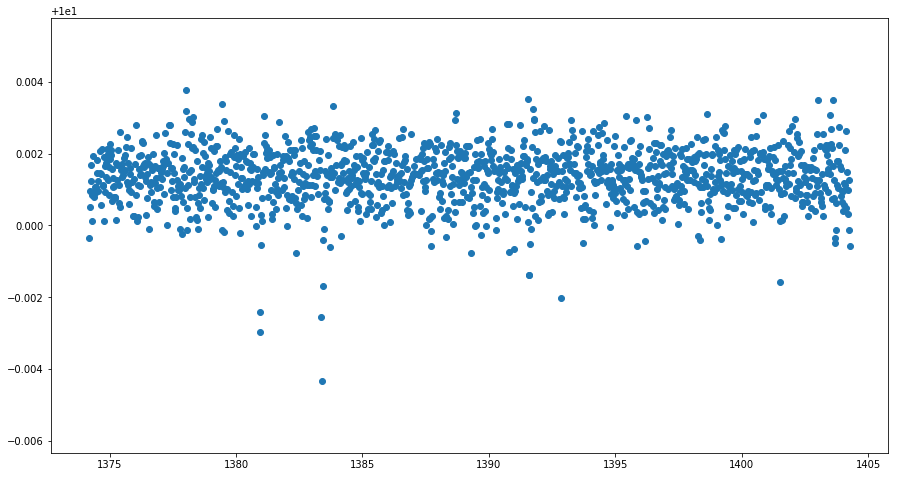

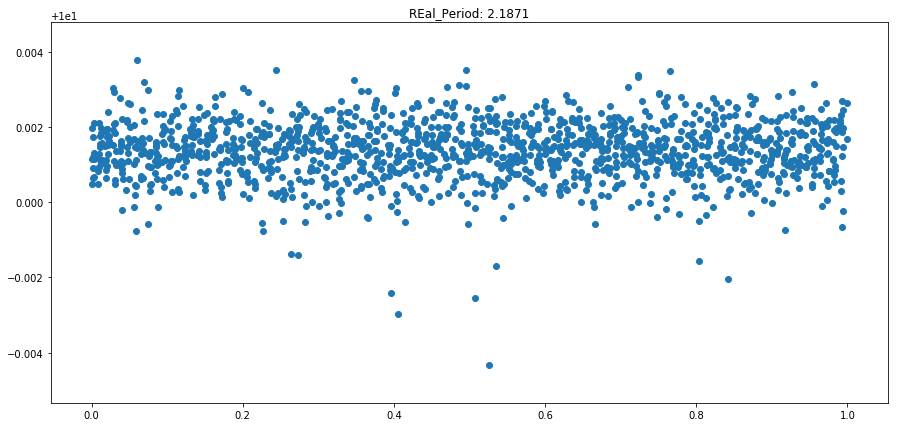

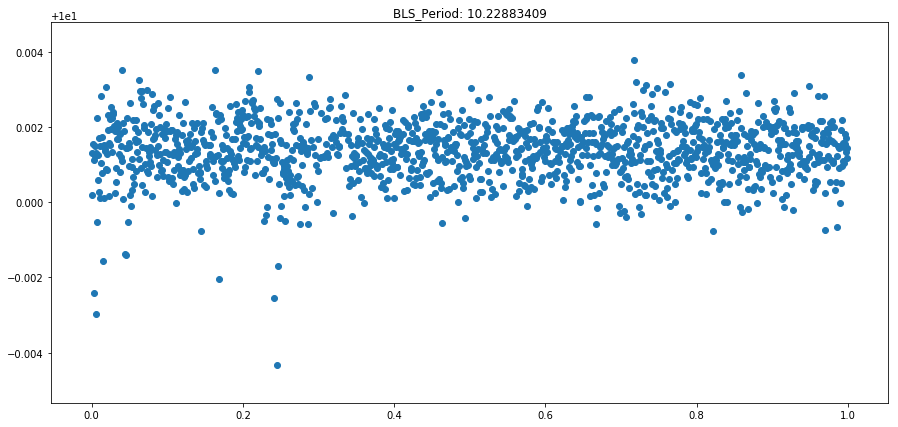

In [157]:
weird_ids = np.loadtxt("../Data/Weird_Ids_3.txt").astype(int)
weird_periods = np.loadtxt("../Data/Weird_Ids_Real_Period.txt")
weird_bls = np.loadtxt("../Data/Weird_Ids_BLS_Period.txt")
#print weird_ids
#plot above
ind = 18
name = "kplr00{0}-{1}_prim.txt".format(weird_ids[ind, 0], weird_ids[ind, 1])
print name
bls_name = name.split(".")[0] + "_ltf.blsanal"
detrended = name.split(".")[0] + "_ltf.lc"
bls_data = np.loadtxt("../../../Training/simulation/primaryinj1/"+bls_name)[0, 0:]
first_lc = np.loadtxt("../../../Training/simulation/primaryinj1/" + name)
lc_detrended = np.loadtxt("../../../Training/simulation/primaryinj1/" + detrended)
    
    
plt.figure(figsize=(15,8))
#plt.scatter(first_lc[:, 0], first_lc[:,1], marker = ".")
plt.scatter(lc_detrended[:, 0], lc_detrended[:, 2])
print "Days?", first_lc.shape[0]/48.
#assuming this is still at 30 min cadence
plt.ylim([lc_detrended[:,2].min()-0.002, lc_detrended[:,2].max()+0.002])

plt.figure(figsize =(15, 7))
plt.title("REal_Period: {0}".format(weird_periods[ind]))
plt.ylim([lc_detrended[:,2].min()-0.001, lc_detrended[:,2].max()+0.001])
plt.scatter((lc_detrended[:,0]/weird_periods[ind]) %1, lc_detrended[:,2], marker = "o", label = "Fold with real_P")
plt.figure(figsize=(15, 7))
plt.ylim([lc_detrended[:,2].min()-0.001, lc_detrended[:,2].max()+0.001])
plt.scatter((lc_detrended[:,0]/weird_bls[ind]) %1, lc_detrended[:,2], marker="o", label = "Fold with bls_P")
#plt.legend()
plt.title("BLS_Period: {0}".format(weird_bls[ind]))

In [170]:
print tol
print len(np.where((tol<0.02)* (SNR>6)* (real_periods<(26.//3)))[0])
tol_feats = np.hstack([SNR_feats[:,:2], tol.reshape(10000,1)])
np.savetxt("../Data/Kplr_tol.txt",tol_feats)

[ 0.01829607  0.01960812  0.01944421 ...,  0.0633545   0.61675588
  0.72203434]
684
